In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('heart_attack_prediction_dataset.csv')

In [9]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [10]:
X = data[['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']]
y = data['Heart Attack Risk']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [12]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_train)

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [14]:
pca = PCA(n_components = 2)

train_pca = pca.fit_transform(X_train)

In [15]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
svc = SVC()

svc.fit(X_train, y_train)

SVC()

In [17]:
kmeans_test = kmeans.predict(X_test)

print("KMeans Doğruluk Oranı:", accuracy_score(y_test, kmeans_test))

KMeans Doğruluk Oranı: 0.4880273660205245


In [22]:
dt_test = dt.predict(X_test)
print("Decision Tree Classifier Doğruluk Oranı:", accuracy_score(y_test, dt_test))


Decision Tree Classifier Doğruluk Oranı: 0.5210946408209807


In [23]:
svc_test = svc.predict(X_test)
print("SVC Doğruluk Oranı:", accuracy_score(y_test, svc_test))


SVC Doğruluk Oranı: 0.6225769669327252


In [25]:
kmeans_pred = kmeans.predict(X_test)
dt_pred = dt.predict(X_test)
svc_pred = svc.predict(X_test)

In [26]:
kmeans_accuracy = accuracy_score(y_test, kmeans_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
svc_accuracy = accuracy_score(y_test, svc_pred)

In [27]:
accuracies = [kmeans_accuracy, dt_accuracy, svc_accuracy]
algorithms = ['KMeans', 'Decision Tree', 'SVC']

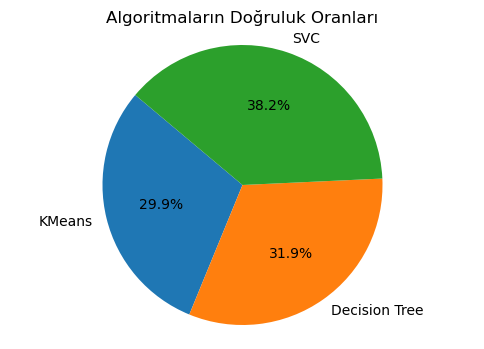

In [29]:
plt.figure(figsize=(6, 4))
plt.pie(accuracies, labels=algorithms, autopct='%1.1f%%', startangle=140)
plt.title('Algoritmaların Doğruluk Oranları')
plt.axis('equal')
plt.show()